<>:13: DeprecationWarning: invalid escape sequence '\P'
<>:13: DeprecationWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28228\4131818761.py:13: DeprecationWarning: invalid escape sequence '\P'
  df=pd.read_csv('D:\PYTHON\Project1\Datas\cleaned.csv')


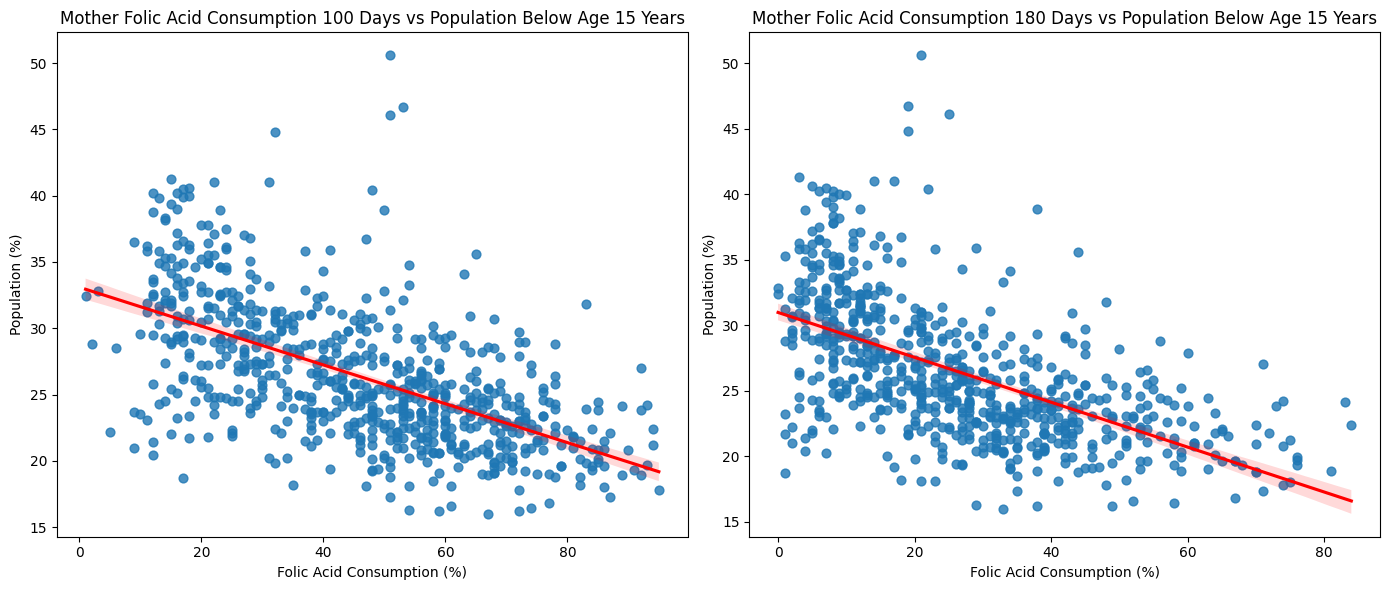

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mlxtend.frequent_patterns import apriori, association_rules

#Load Cleaned Data set
df=pd.read_csv('D:\PYTHON\Project1\Datas\datafile.csv')

# Replace all '*' and '()' with NaN
df.replace(['*', '()'], np.nan, inplace=True)
#retreive only number from object columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.extract(r'(\d+)').astype(float)

# Cleaned data set except 1,2 column
df.to_csv('Precleaned_datafile.csv', index=False)
#Load orginal dataset for column 1,2
df=pd.read_csv("datafile.csv")
df1=pd.read_csv('Precleaned_datafile.csv')
#updating column 1,2 in Precleaned dataset
df1["District Names"]=df["District Names"]
df1["State/UT"]=df["State/UT"]
#saving final cleaned dataset
df1.to_csv("Finalcleaned_datafile.csv")


In [48]:
#load a cleaned data set
df=pd.read_csv('D:\PYTHON\Project1\Datas\Finalcleaned_datafile.csv')

<>:2: DeprecationWarning: invalid escape sequence '\P'
<>:2: DeprecationWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28228\3083147153.py:2: DeprecationWarning: invalid escape sequence '\P'
  df=pd.read_csv('D:\PYTHON\Project1\Datas\Finalcleaned_datafile.csv')


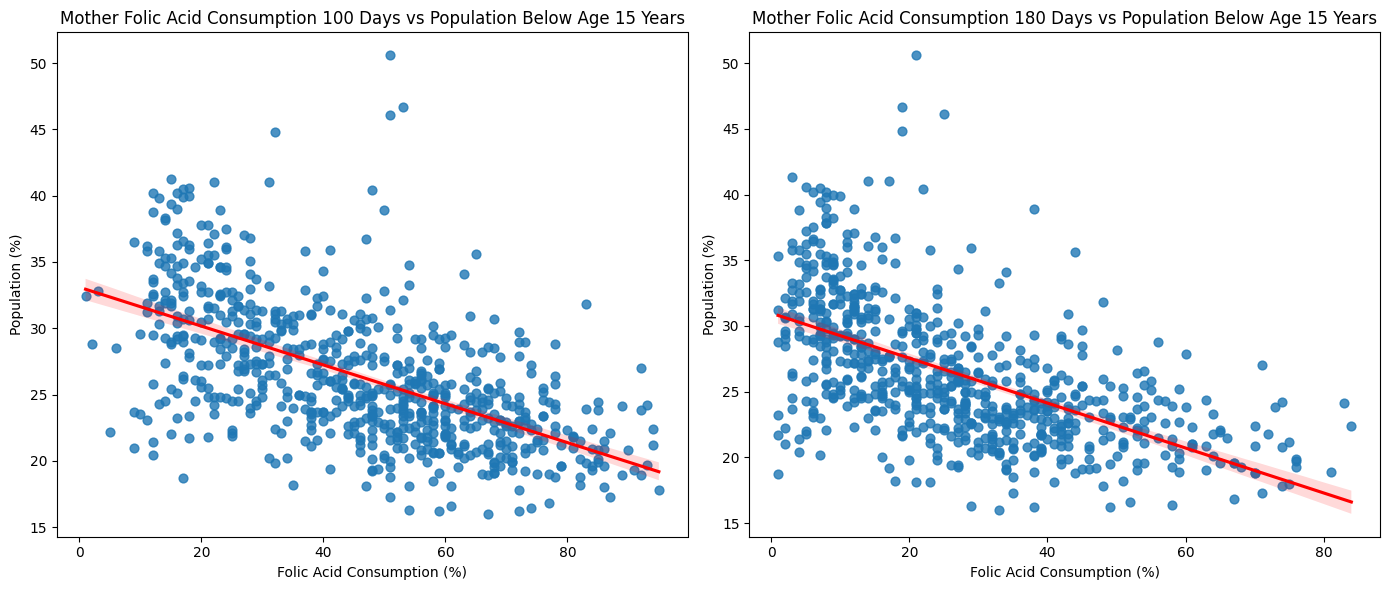

In [49]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.regplot(
    x=df['Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)'],
    y=df['Population below age 15 years (%)'],
    scatter_kws={'s':40},line_kws={"color":"red"},ax=ax[0])
sns.regplot(x=df['Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)'],
            y=df['Population below age 15 years (%)'],
            scatter_kws={'s':40},line_kws={"color":"red"},ax=ax[1])
ax[0].set_xlabel("Folic Acid Consumption (%)")
ax[0].set_ylabel("Population (%)")
ax[0].set_title("Mother Folic Acid Consumption 100 Days vs Population Below Age 15 Years")
ax[1].set_xlabel("Folic Acid Consumption (%)")
ax[1].set_ylabel("Population (%)")
ax[1].set_title("Mother Folic Acid Consumption 180 Days vs Population Below Age 15 Years")
plt.tight_layout()
plt.show()

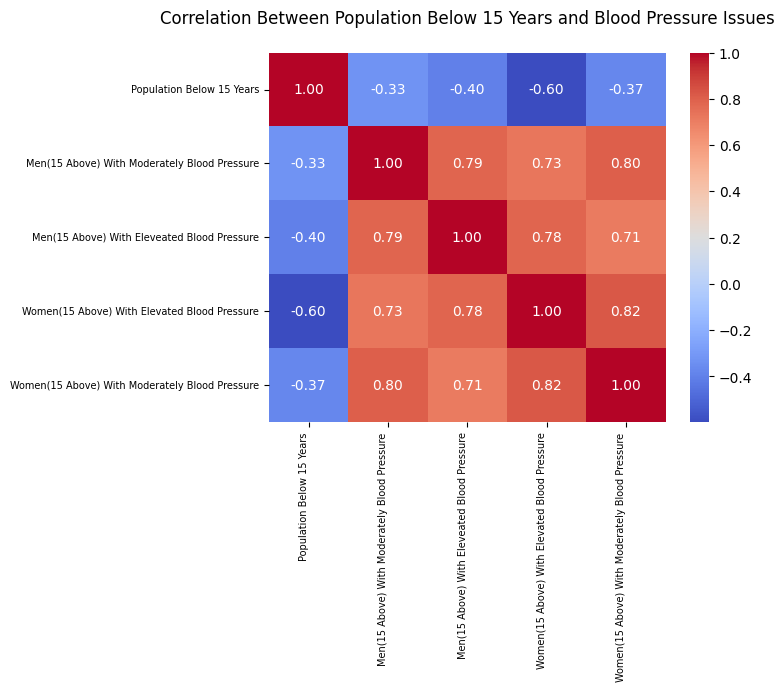

In [50]:


req_data=df[['Population below age 15 years (%)',
             'Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)',
             'Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
             'Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)',
             'Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)']]
labels=['Population Below 15 Years','Men(15 Above) With Moderately Blood Pressure','Men(15 Above) With Eleveated Blood Pressure',
        'Women(15 Above) With Elevated Blood Pressure','Women(15 Above) With Moderately Blood Pressure']
ax=sns.heatmap(req_data.corr(),annot=True,cmap='coolwarm',fmt=".2f")
ax.set_xticklabels(labels,rotation=90,ha='right',fontsize=7)
ax.set_yticklabels(labels,rotation=0,fontsize=7)
plt.title("Correlation Between Population Below 15 Years and Blood Pressure Issues\n")
plt.show()


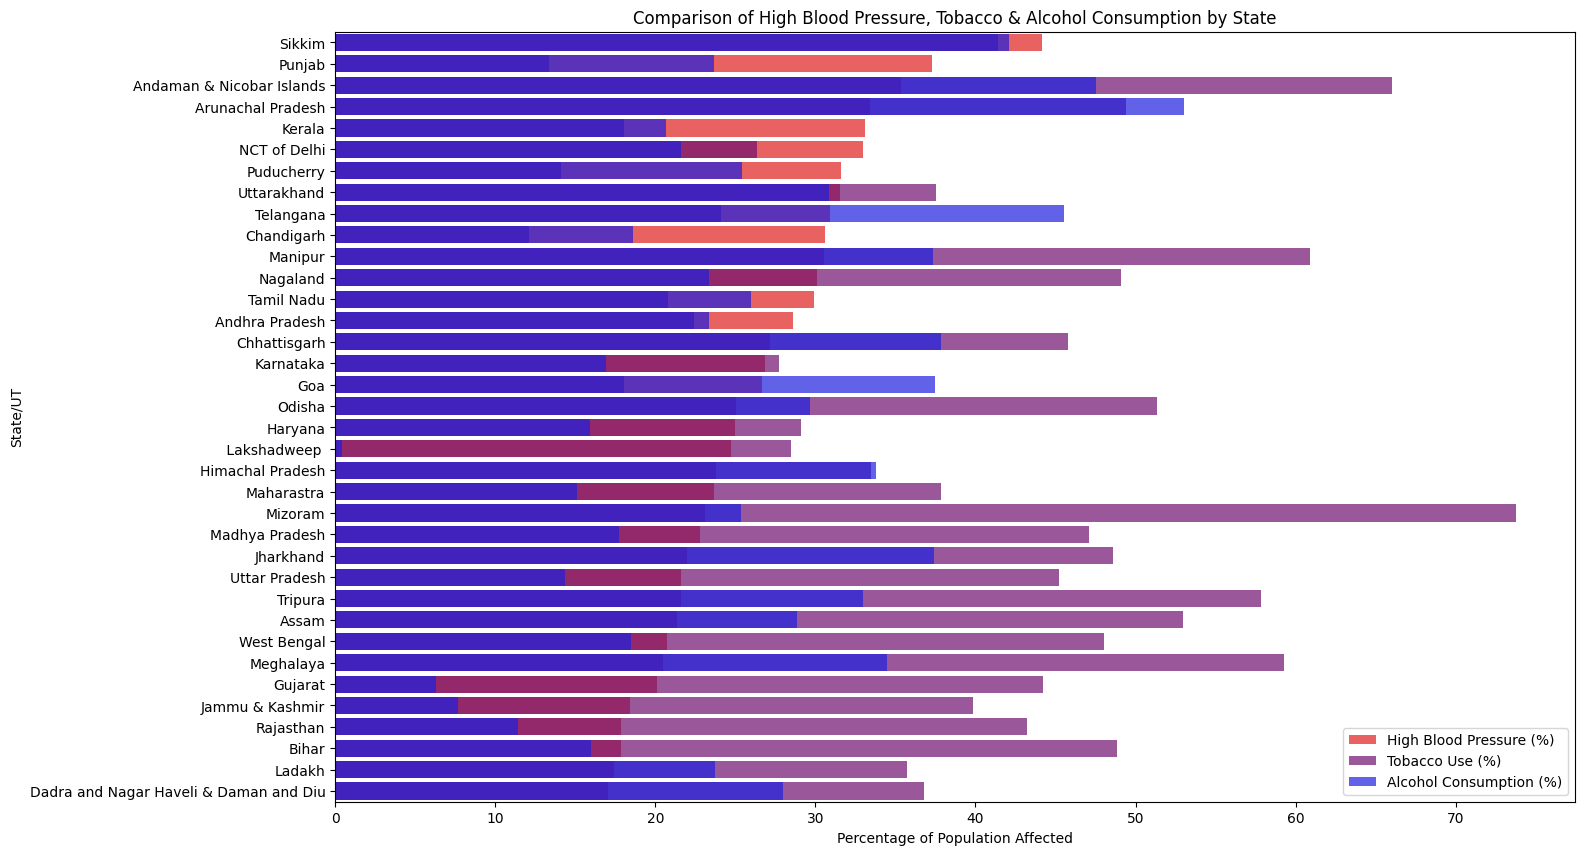

In [51]:
# Group by state and calculate mean values
statewise_data = df.groupby("State/UT").mean(numeric_only=True).reset_index()

# Select relevant columns
bp_col = "Men age 15 years and above wih Elevated blood pressure (Systolic \u2265140 mm of Hg and/or Diastolic \u226590 mm of Hg) or taking medicine to control blood pressure (%)"
tobacco_col = "Men age 15 years and above who use any kind of tobacco (%)"
alcohol_col = "Men age 15 years and above who consume alcohol (%)"

# Sort states by blood pressure prevalence
statewise_data_sorted = statewise_data.sort_values(by=bp_col, ascending=False)

# Set figure size
plt.figure(figsize=(16, 10))

# Create grouped bar plot
sns.barplot(y=statewise_data_sorted["State/UT"], x=statewise_data_sorted[bp_col], label="High Blood Pressure (%)", color="red", alpha=0.7)
sns.barplot(y=statewise_data_sorted["State/UT"], x=statewise_data_sorted[tobacco_col], label="Tobacco Use (%)", color="purple", alpha=0.7)
sns.barplot(y=statewise_data_sorted["State/UT"], x=statewise_data_sorted[alcohol_col], label="Alcohol Consumption (%)", color="blue", alpha=0.7)

# Titles and labels
plt.title("Comparison of High Blood Pressure, Tobacco & Alcohol Consumption by State")
plt.xlabel("Percentage of Population Affected")
plt.ylabel("State/UT")
plt.legend()

# Show plot
plt.show()

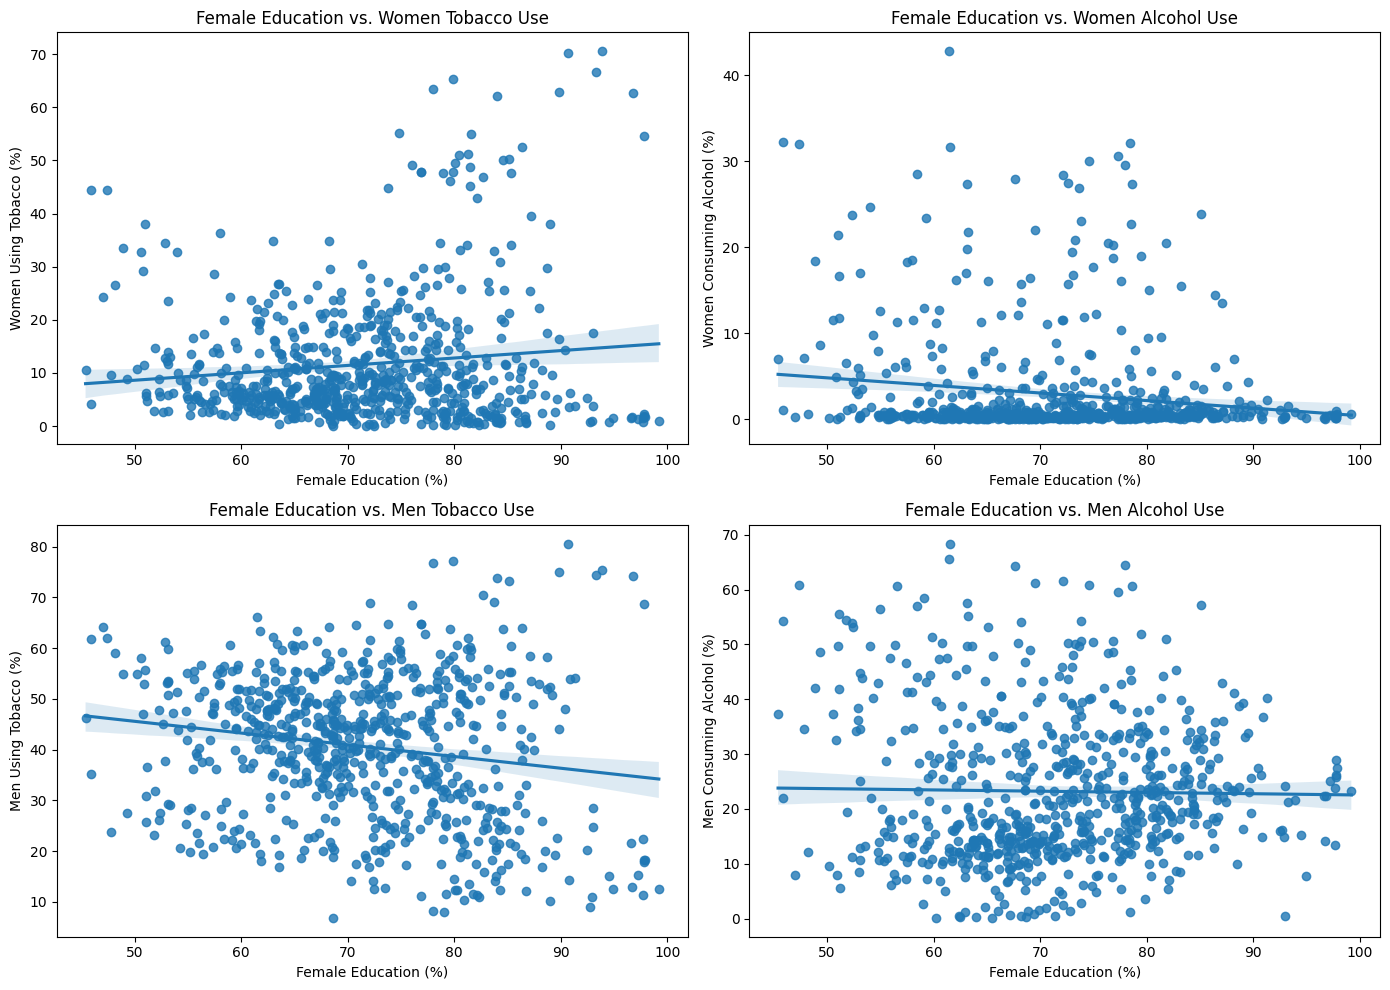

In [52]:
# Clean column names to remove extra spaces
df.columns = df.columns.str.strip()

# Rename selected columns for easier reference
df.rename(columns={
    'District Names': 'District',
    'State/UT': 'State',
    'Female population age 6 years and above who ever attended school (%)': 'Female Education (%)',
    'Women age 15 years and above who use any kind of tobacco (%)': 'Women Tobacco Use (%)',
    'Men age 15 years and above who use any kind of tobacco (%)': 'Men Tobacco Use (%)',
    'Women age 15 years and above who consume alcohol (%)': 'Women Alcohol Use (%)',
    'Men age 15 years and above who consume alcohol (%)': 'Men Alcohol Use (%)'
}, inplace=True)

# Selecting relevant columns
edu_vs_substance = df[['Female Education (%)', 'Women Tobacco Use (%)', 'Men Tobacco Use (%)',
                       'Women Alcohol Use (%)', 'Men Alcohol Use (%)']].dropna()

# Creating scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Women - Education vs Tobacco
sns.regplot(x=edu_vs_substance['Female Education (%)'], y=edu_vs_substance['Women Tobacco Use (%)'], ax=axes[0, 0])
axes[0, 0].set_title("Female Education vs. Women Tobacco Use")
axes[0, 0].set_xlabel("Female Education (%)")
axes[0, 0].set_ylabel("Women Using Tobacco (%)")

# Women - Education vs Alcohol
sns.regplot(x=edu_vs_substance['Female Education (%)'], y=edu_vs_substance['Women Alcohol Use (%)'], ax=axes[0, 1])
axes[0, 1].set_title("Female Education vs. Women Alcohol Use")
axes[0, 1].set_xlabel("Female Education (%)")
axes[0, 1].set_ylabel("Women Consuming Alcohol (%)")

# Men - Education vs Tobacco
sns.regplot(x=edu_vs_substance['Female Education (%)'], y=edu_vs_substance['Men Tobacco Use (%)'], ax=axes[1, 0])
axes[1, 0].set_title("Female Education vs. Men Tobacco Use")
axes[1, 0].set_xlabel("Female Education (%)")
axes[1, 0].set_ylabel("Men Using Tobacco (%)")

# Men - Education vs Alcohol
sns.regplot(x=edu_vs_substance['Female Education (%)'], y=edu_vs_substance['Men Alcohol Use (%)'], ax=axes[1, 1])
axes[1, 1].set_title("Female Education vs. Men Alcohol Use")
axes[1, 1].set_xlabel("Female Education (%)")
axes[1, 1].set_ylabel("Men Consuming Alcohol (%)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [56]:


# Selecting relevant numerical features
features = [
    "Women (age 15-49) who are literate4 (%)",
    "Women (age 15-49)  with 10 or more years of schooling (%)",
    "Population living in households that use an improved sanitation facility2 (%)",
    "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)",
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)",
    "Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)",
    "Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)",
]

# Drop rows with missing values in selected features
df_clean = df[features].dropna()

# Convert numerical values into categorical bins (Low, Medium, High)
df_binned = df_clean.apply(lambda x: pd.qcut(x, 3, labels=["Low", "Medium", "High"]))

# Apply one-hot encoding to convert categorical bins into 0/1 format
df_encoded = pd.get_dummies(df_binned)

# Display first few rows
print(df_encoded.head())

# Now apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules with lift > 1.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display top 5 association rules sorted by lift
print(rules.sort_values(by="lift", ascending=False).head())


# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules with lift > 1.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display top 10 rules sorted by lift
print(rules.sort_values(by="lift", ascending=False).head(10))



   Women (age 15-49) who are literate4 (%)_Low  \
0                                        False   
1                                        False   
2                                        False   
3                                         True   
4                                         True   

   Women (age 15-49) who are literate4 (%)_Medium  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Women (age 15-49) who are literate4 (%)_High  \
0                                          True   
1                                          True   
2                                          True   
3                                         False   
4                                         False   

   Women (age 15-49)  with 10 or more years of schooling (%)_Low  \
0    

In [ ]:
# Selecting target variable (FLR)
target ="Female population age 6 years and above who ever attended school (%)"

# Selecting top correlated features as predictors
features = [
    "Women (age 15-49) who are literate4 (%)",
    "Women (age 15-49)  with 10 or more years of schooling (%)",
    "Population living in households that use an improved sanitation facility2 (%)",
    "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)",
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)",
    "Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)",
    "Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)",
]

# Dropping rows with missing values in selected features

# Splitting data into training (80%) and testing (20%)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making Predictions
y_pred = lr_model.predict(X_test)

# Model Performance Metrics (Converted to Percentage)
r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Object-Oriented Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter Plot
ax.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

# Perfect Fit Line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit Line")

# Labels and Title
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Prediction of Female Literacy Above Six Years")

# Adding Model Accuracy in Percentage
accuracy_text = f"Model Accuracy: {r2:.2f}%"
ax.text(0.05, 0.9, accuracy_text, transform=ax.transAxes, fontsize=12, color="black",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Legend
ax.legend()

# Show Plot
plt.show()

In [ ]:
# Selecting relevant numerical features (Modify this if needed)
features = [
    "Women (age 15-49) who are literate4 (%)",
    "Women (age 15-49)  with 10 or more years of schooling (%)",
    "Population living in households that use an improved sanitation facility2 (%)",
    "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)",
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)",
    "Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)",
]

target = "Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)"

# Drop rows with missing values
df_clean = df[features + [target]].dropna()

# Splitting data into training and testing sets
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

fig,ax = plt.subplots(figsize=(8, 5))

ax.scatter(y_test, y_pred, color="purple", alpha=0.7)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--")  # Ideal fit line


# Add model accuracy inside the graph
ax.text(0.05, 0.9, f"Model Accuracy: {r2:.2%}", transform=ax.transAxes, fontsize=12, color="black", 
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Women Personal Hygiene Prediction")
plt.show()